In [1]:
from src.DataPolCurve import PolCurveData, PC1, PC2
from src.DataProcessing import Plot
from src.DataEIS import EISData
from src.GenerateData import GenerateData
from src.GenerateMeasurementPoints import GasFlowCalc, HumidityCalc, \
    MeasurementPoints


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

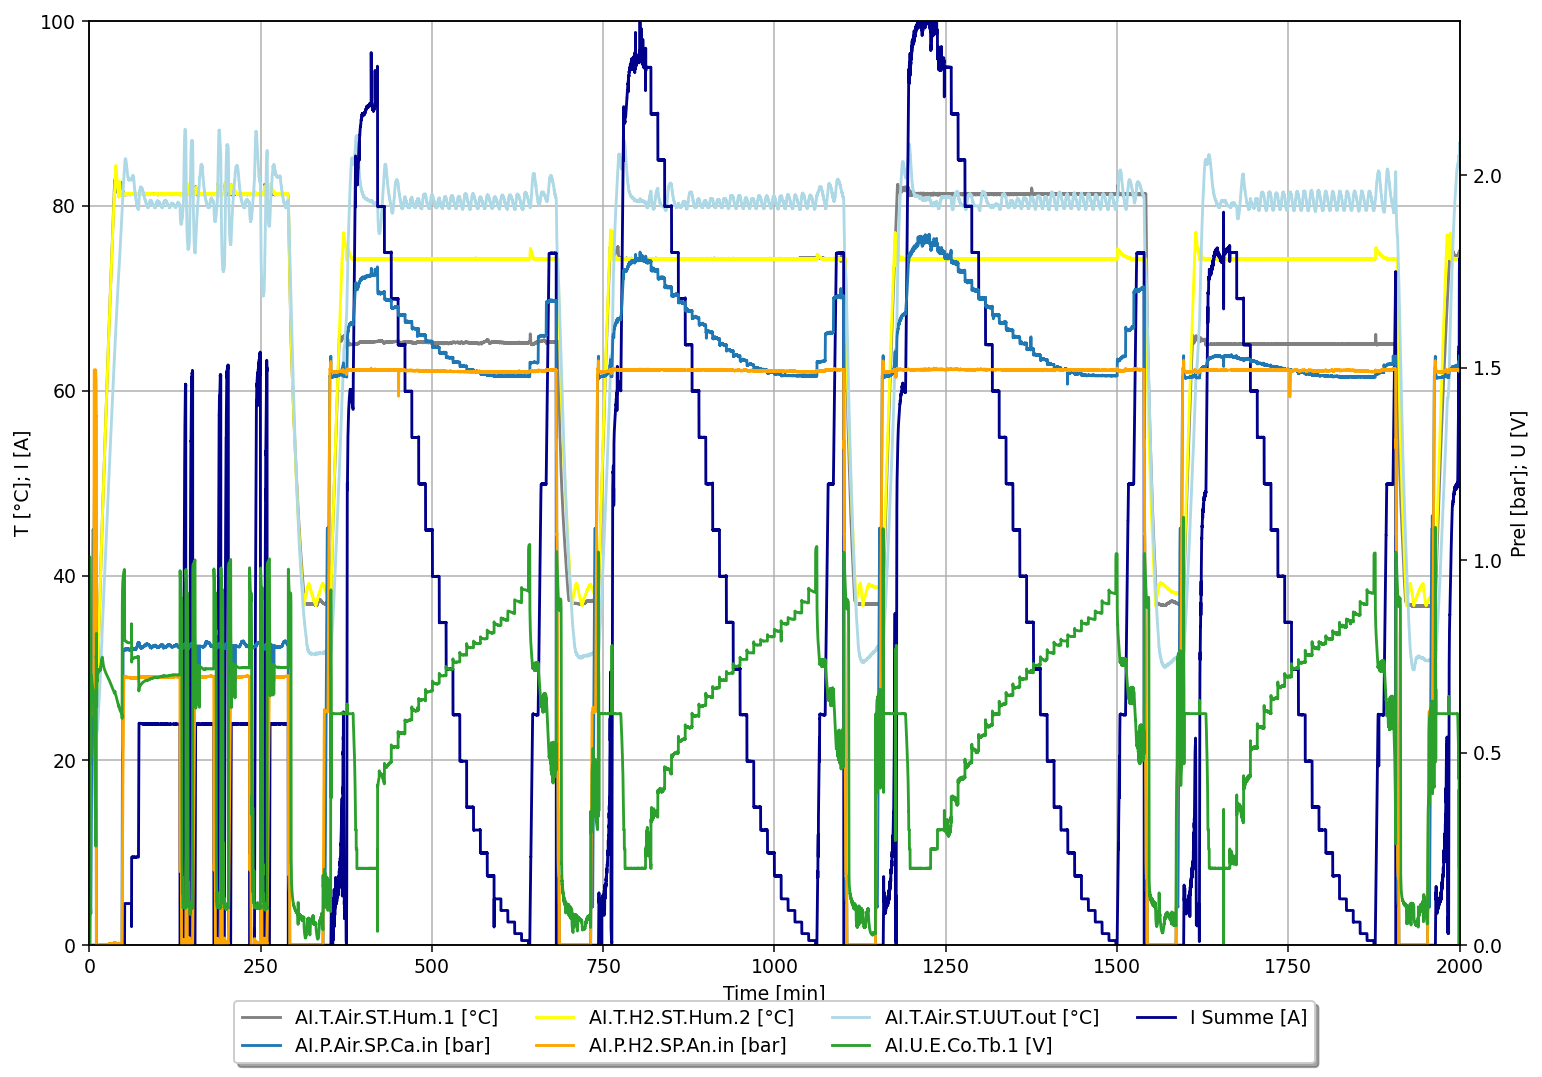

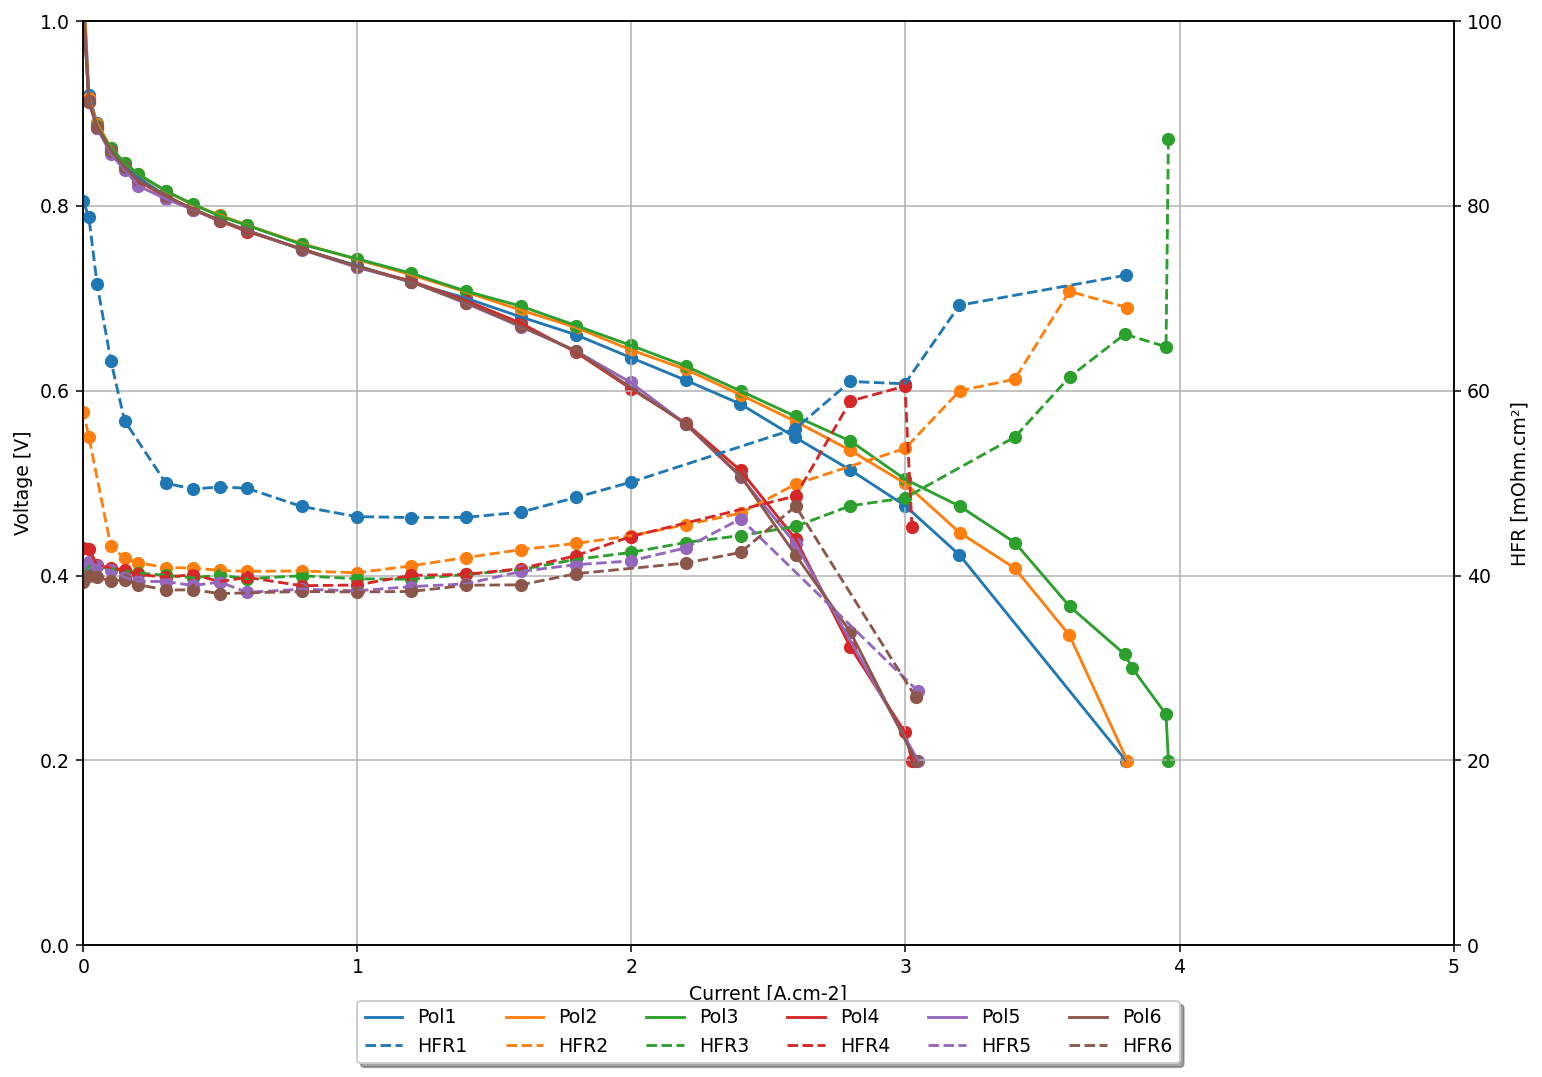

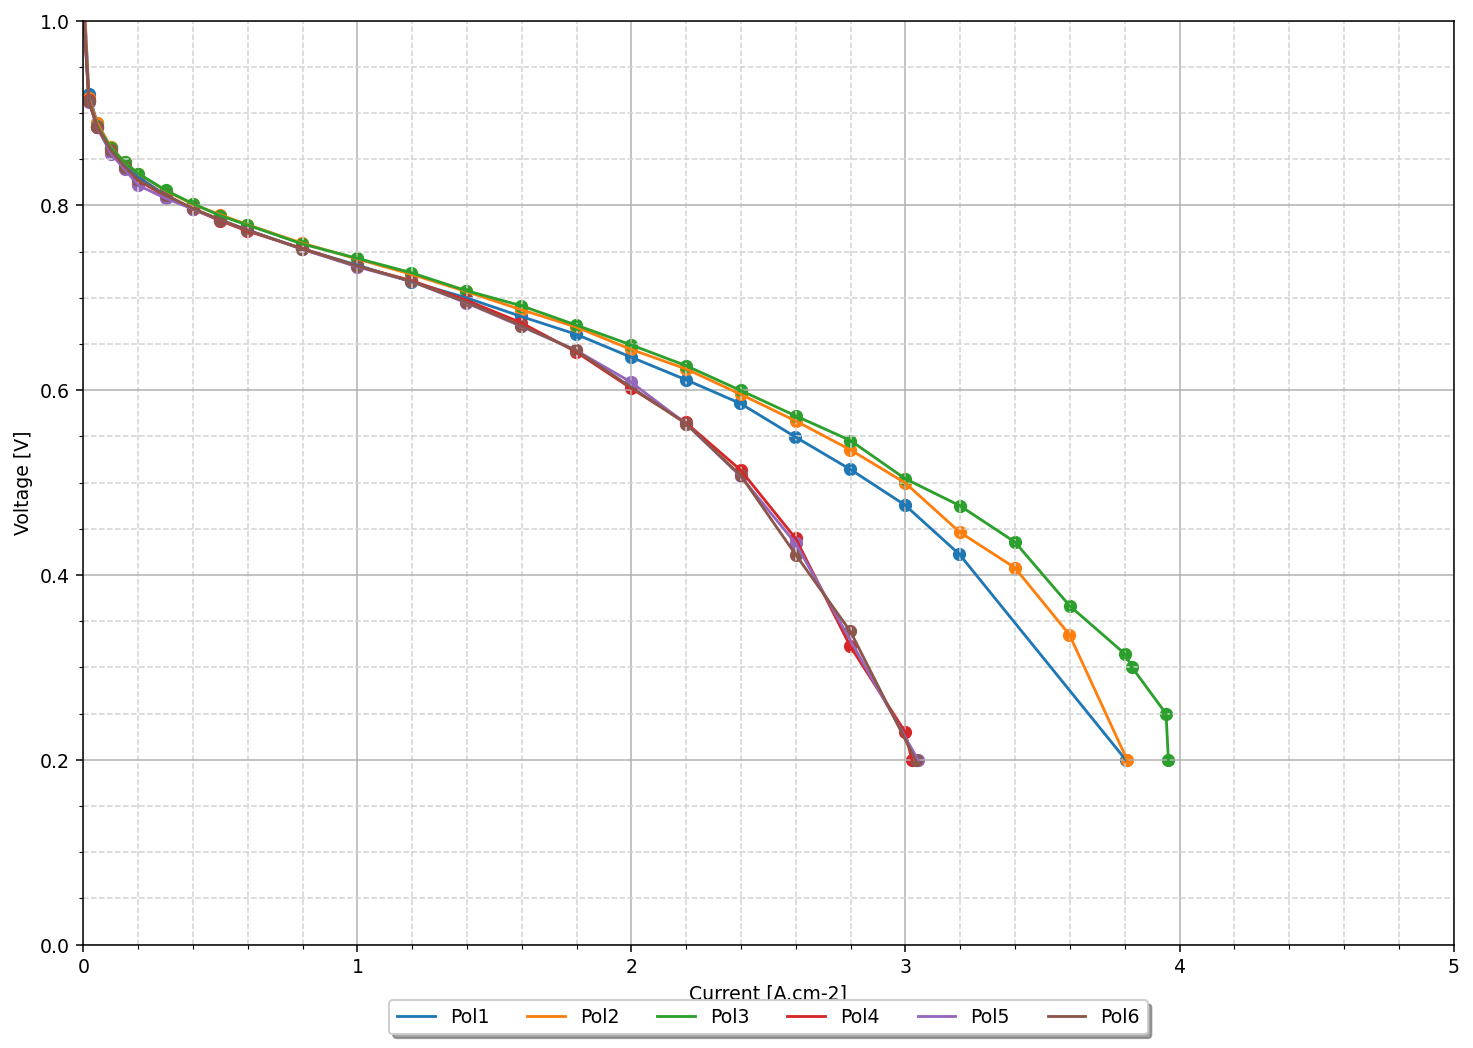

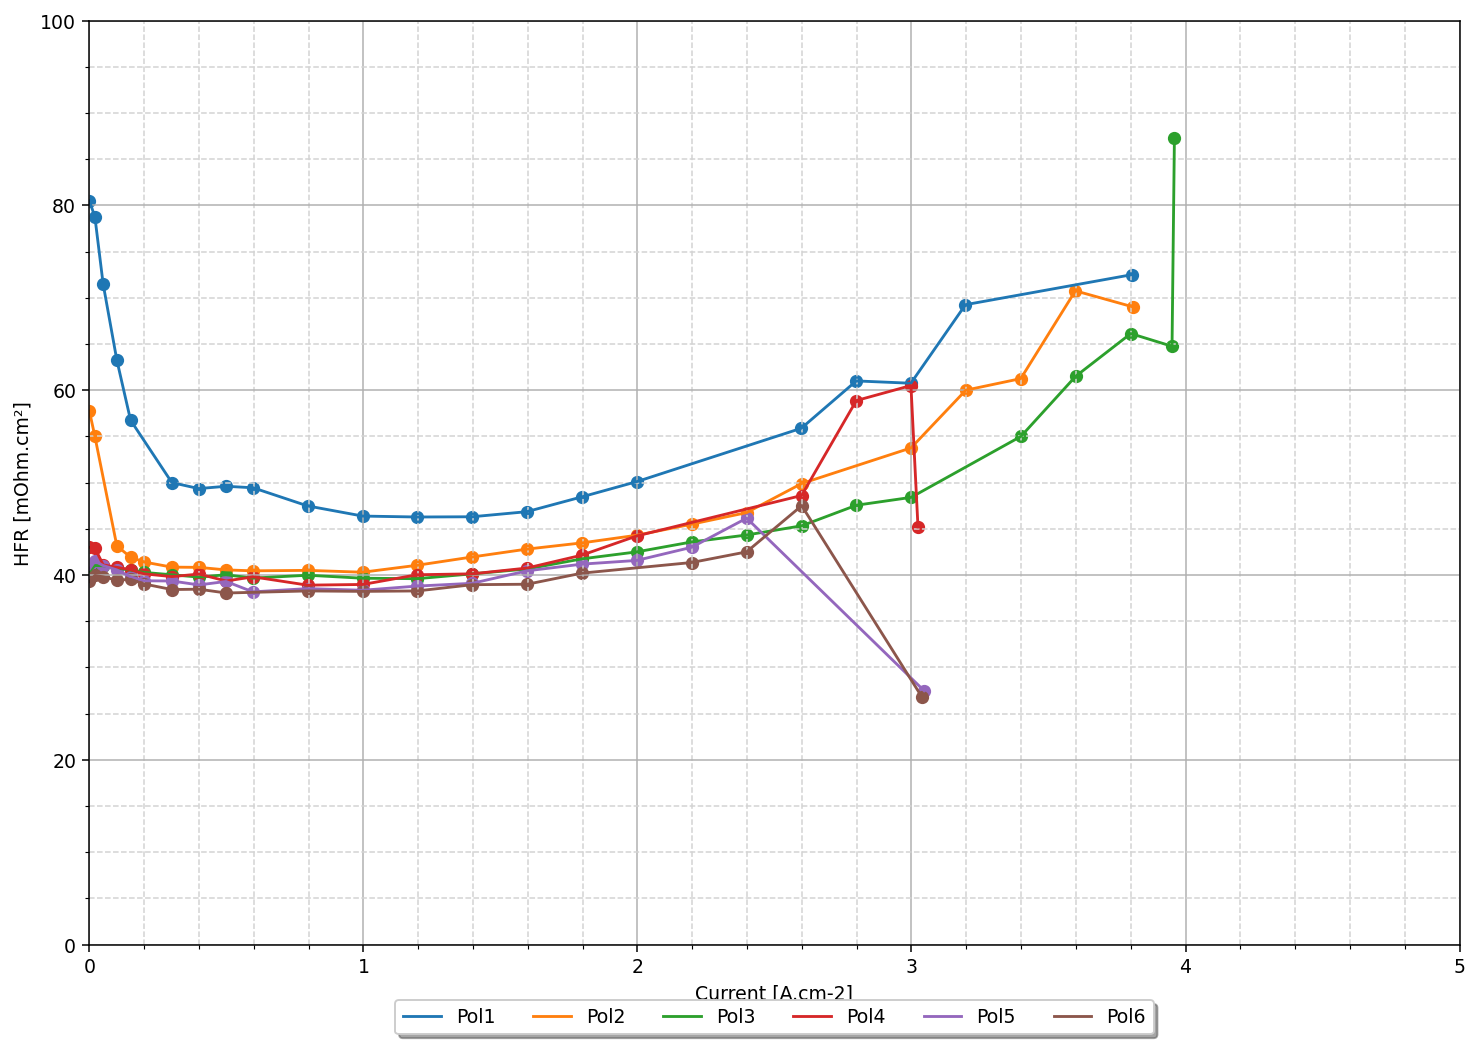

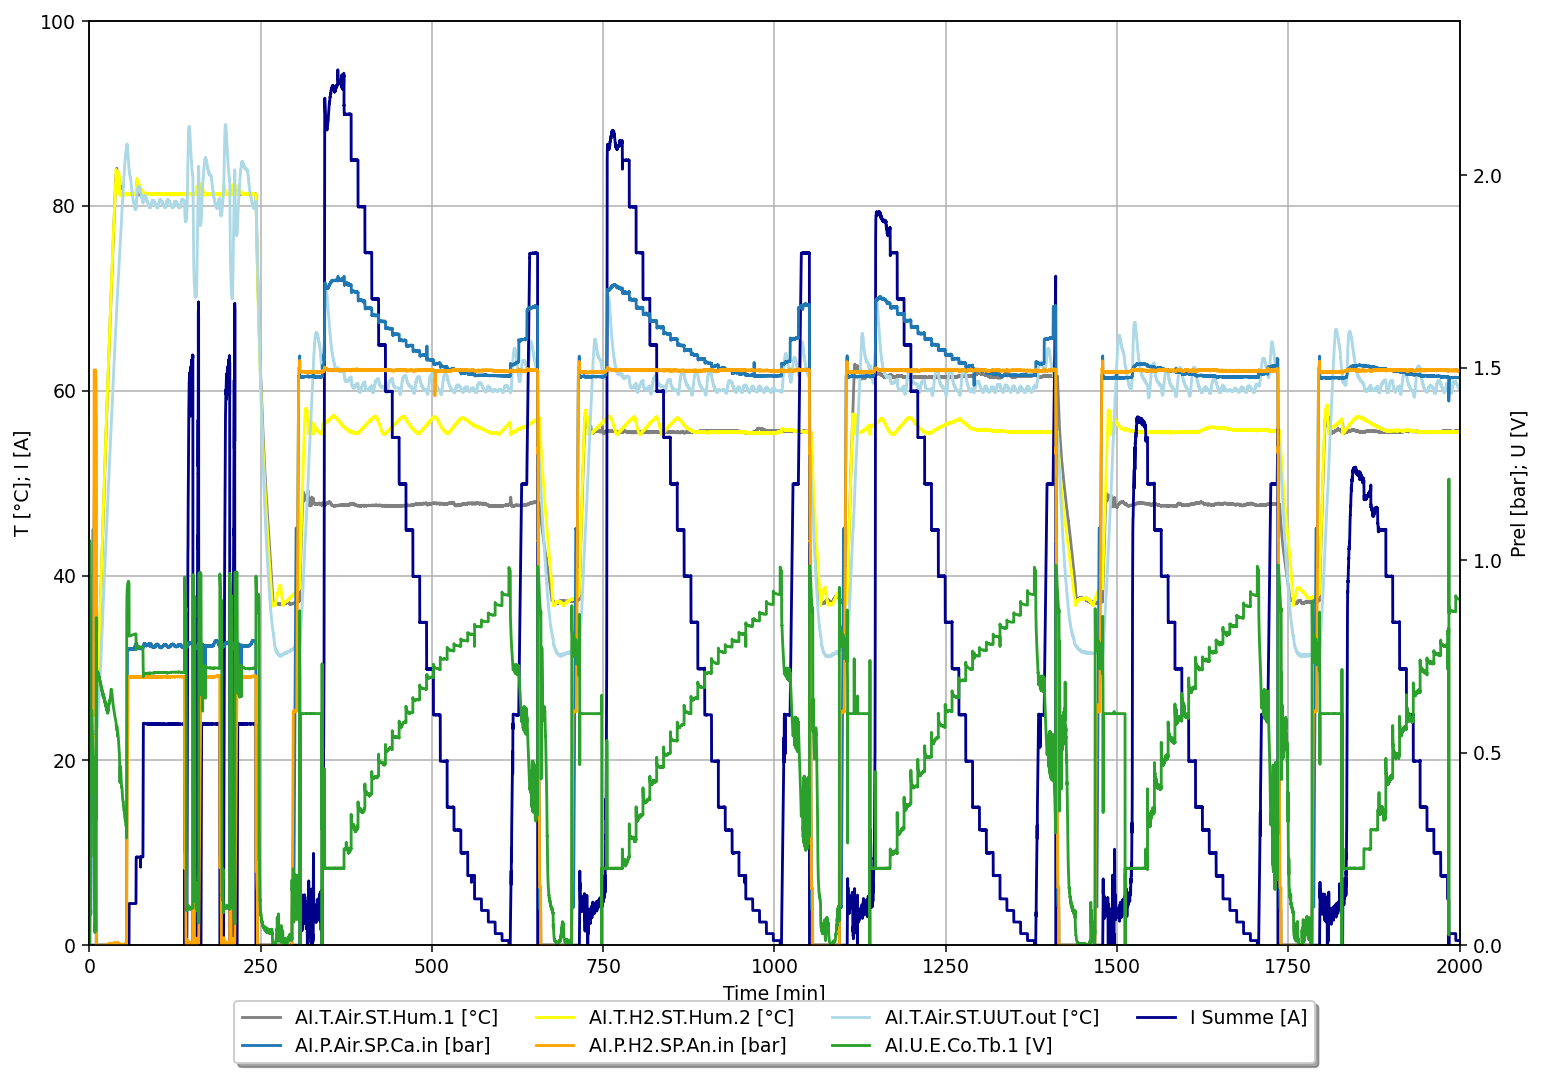

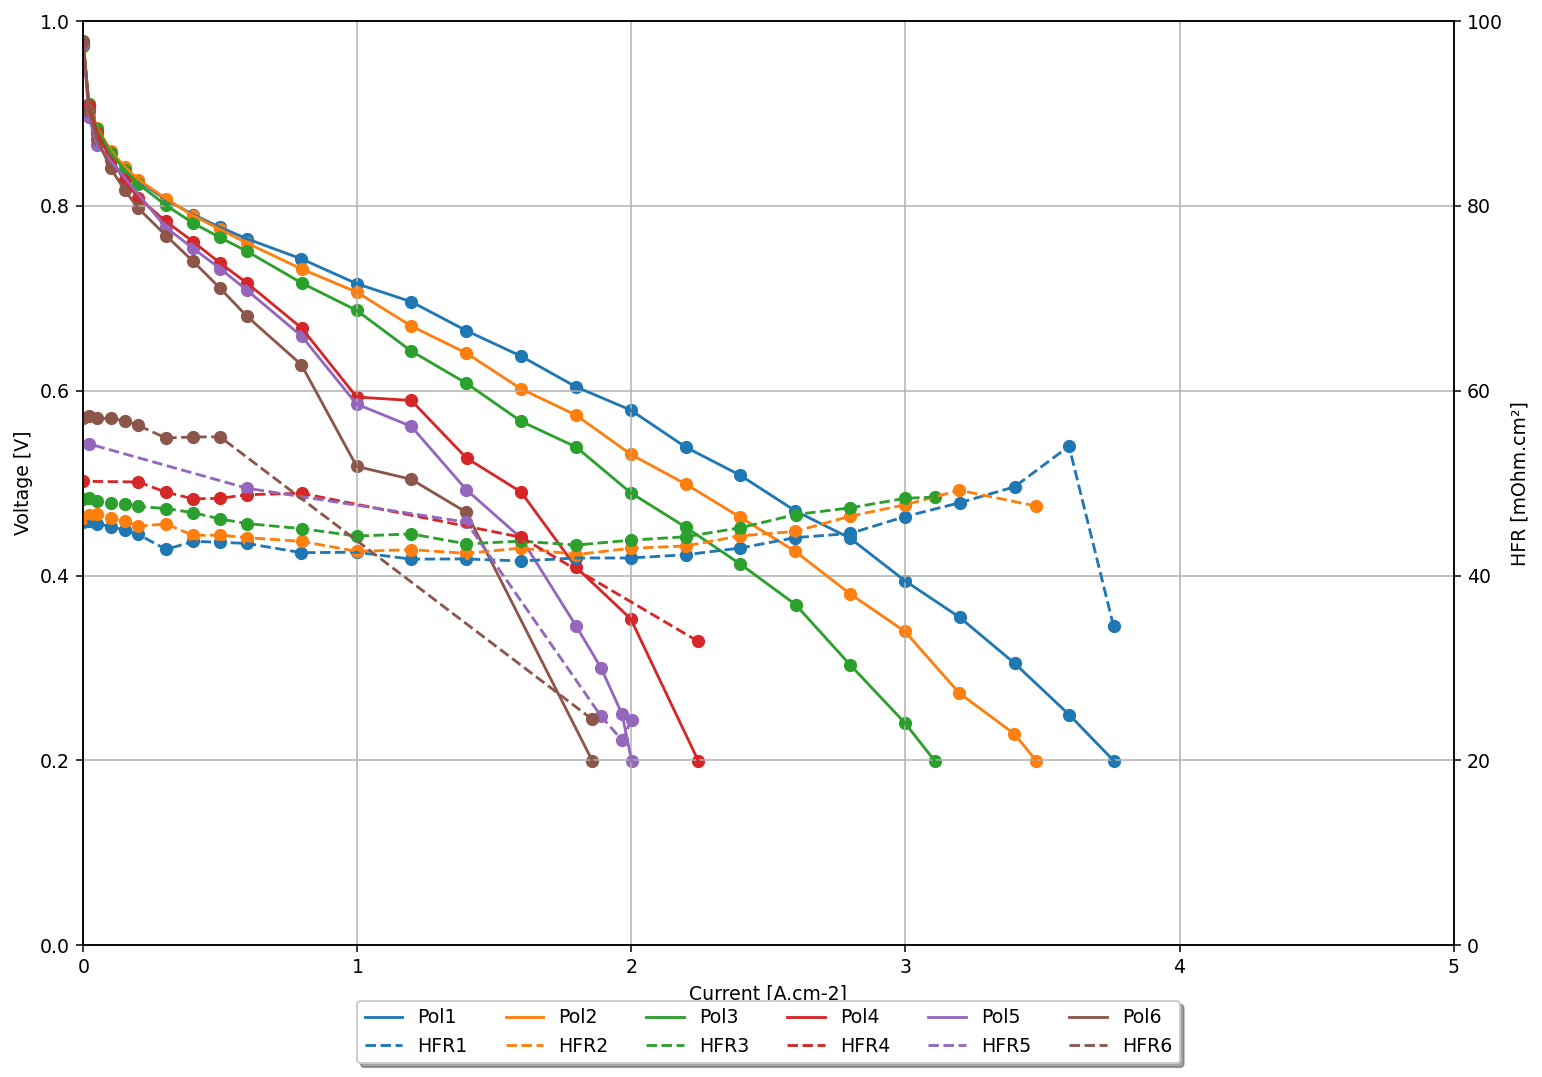

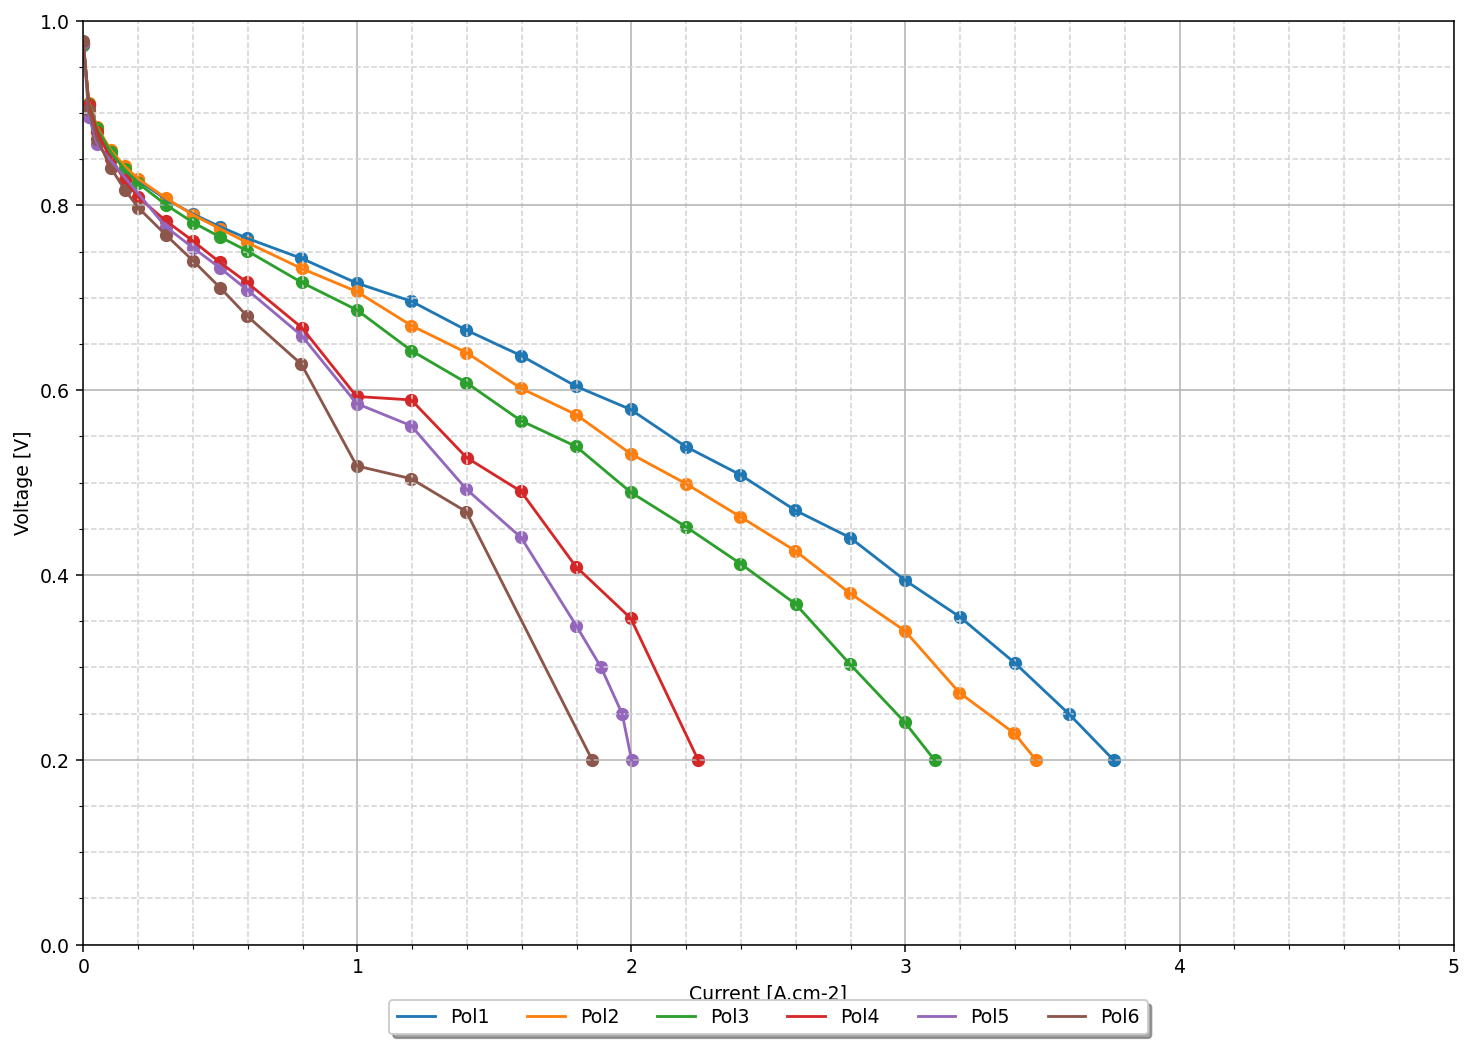

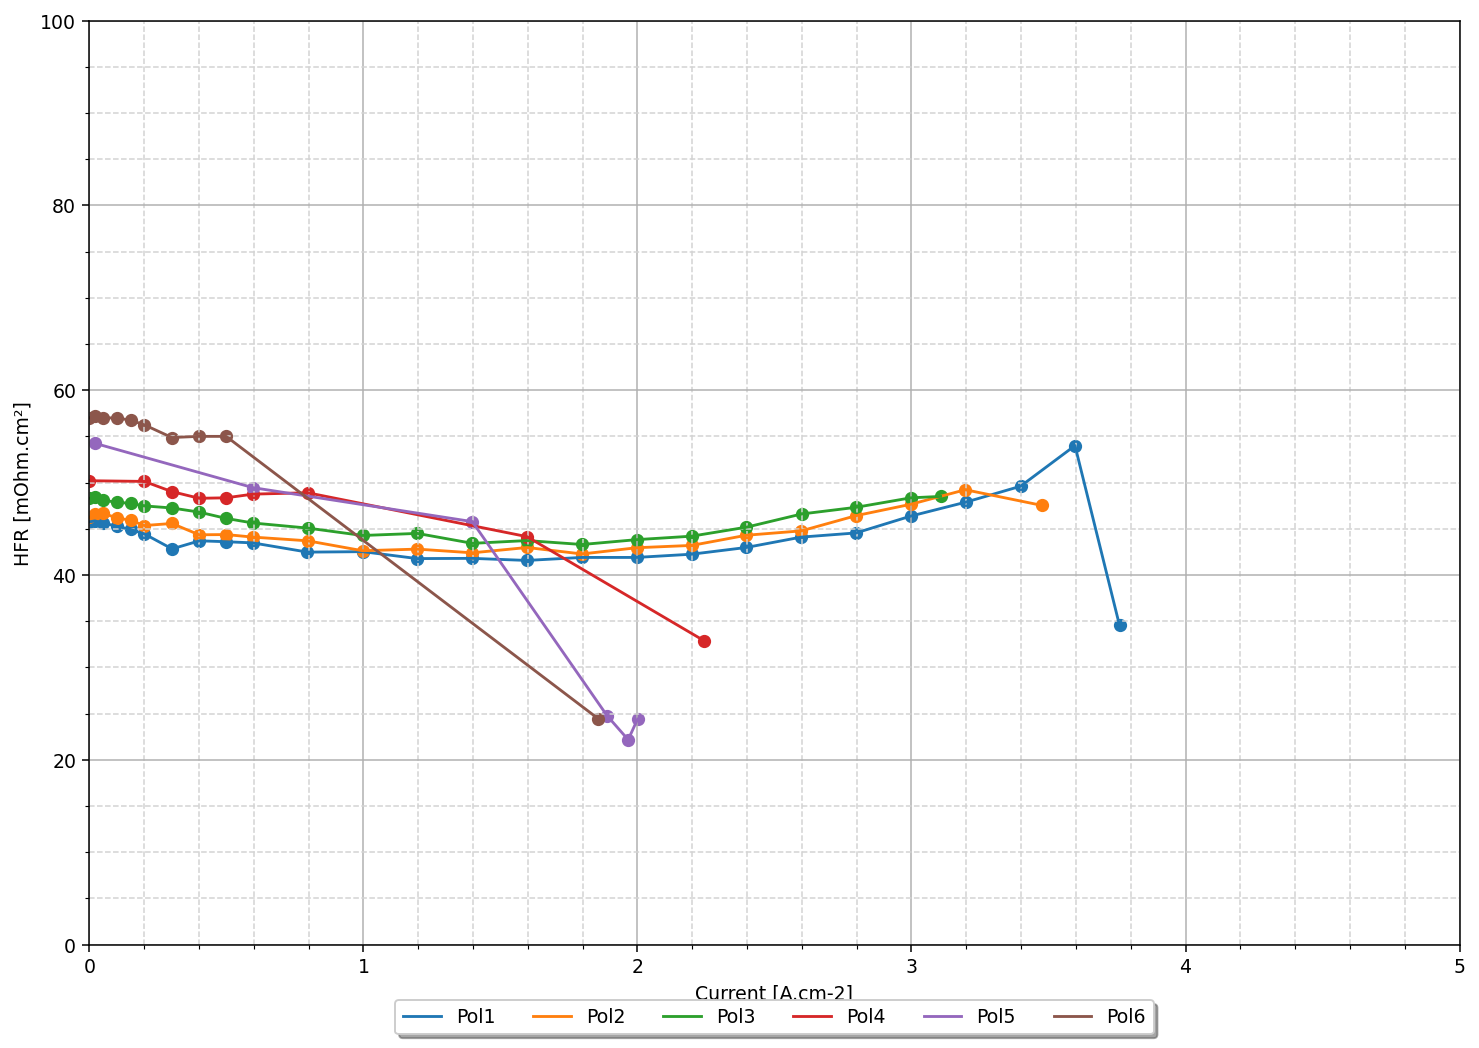

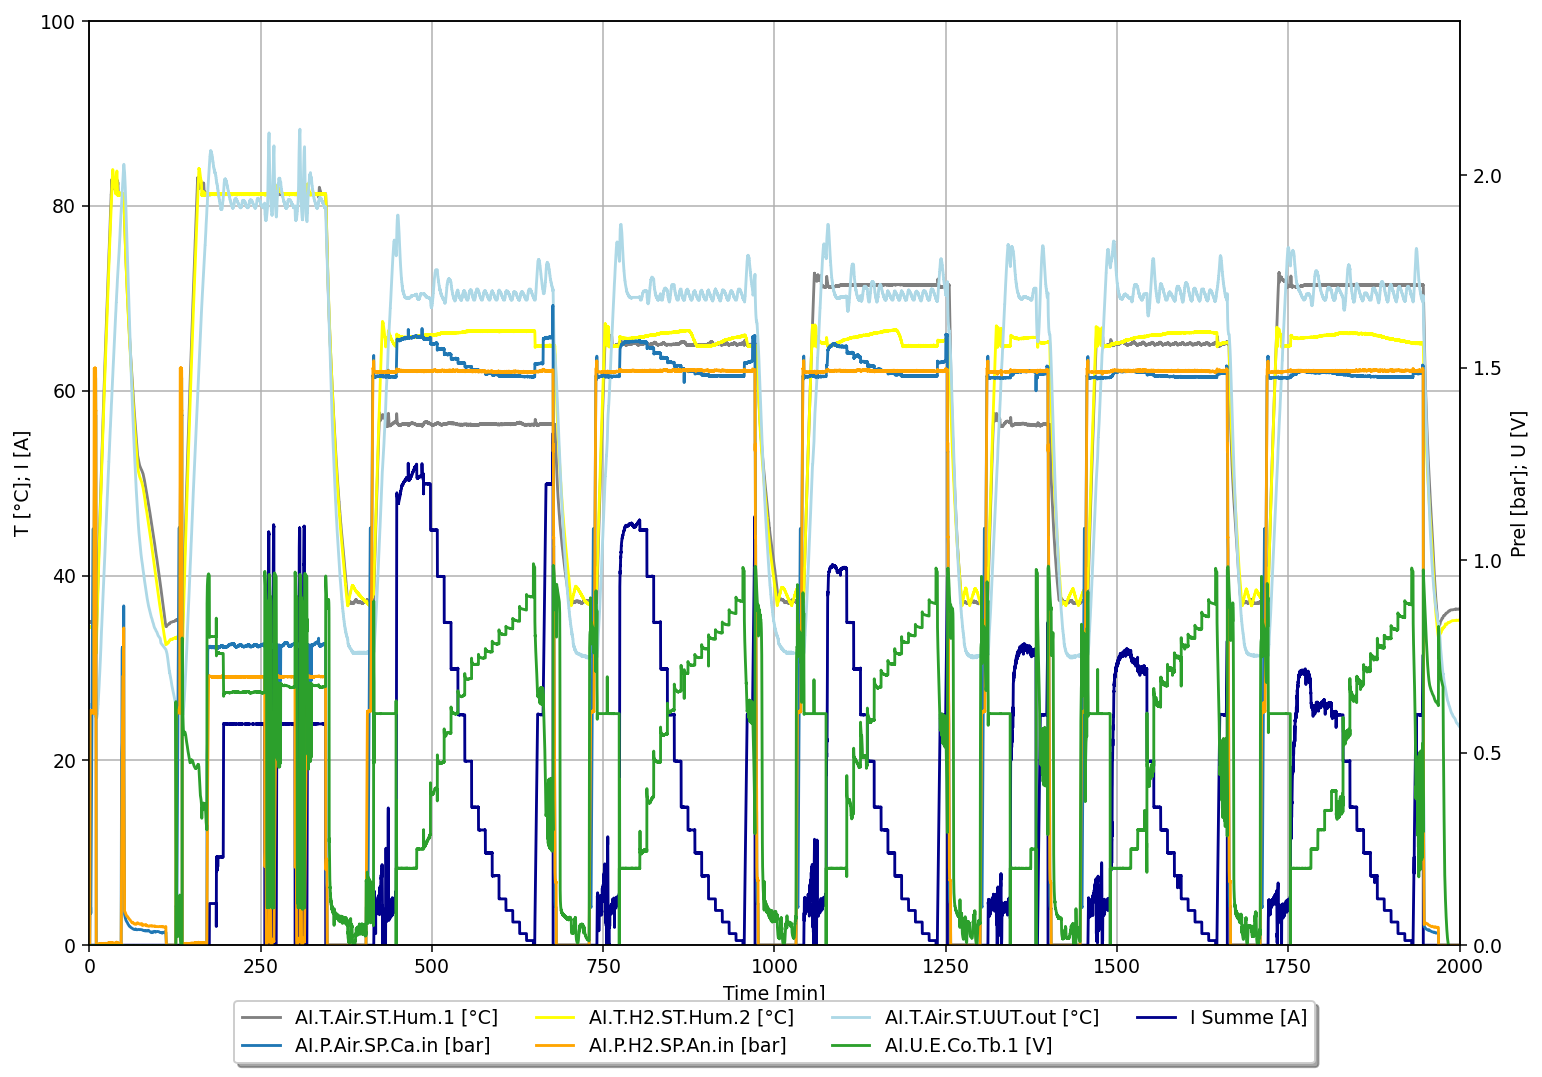

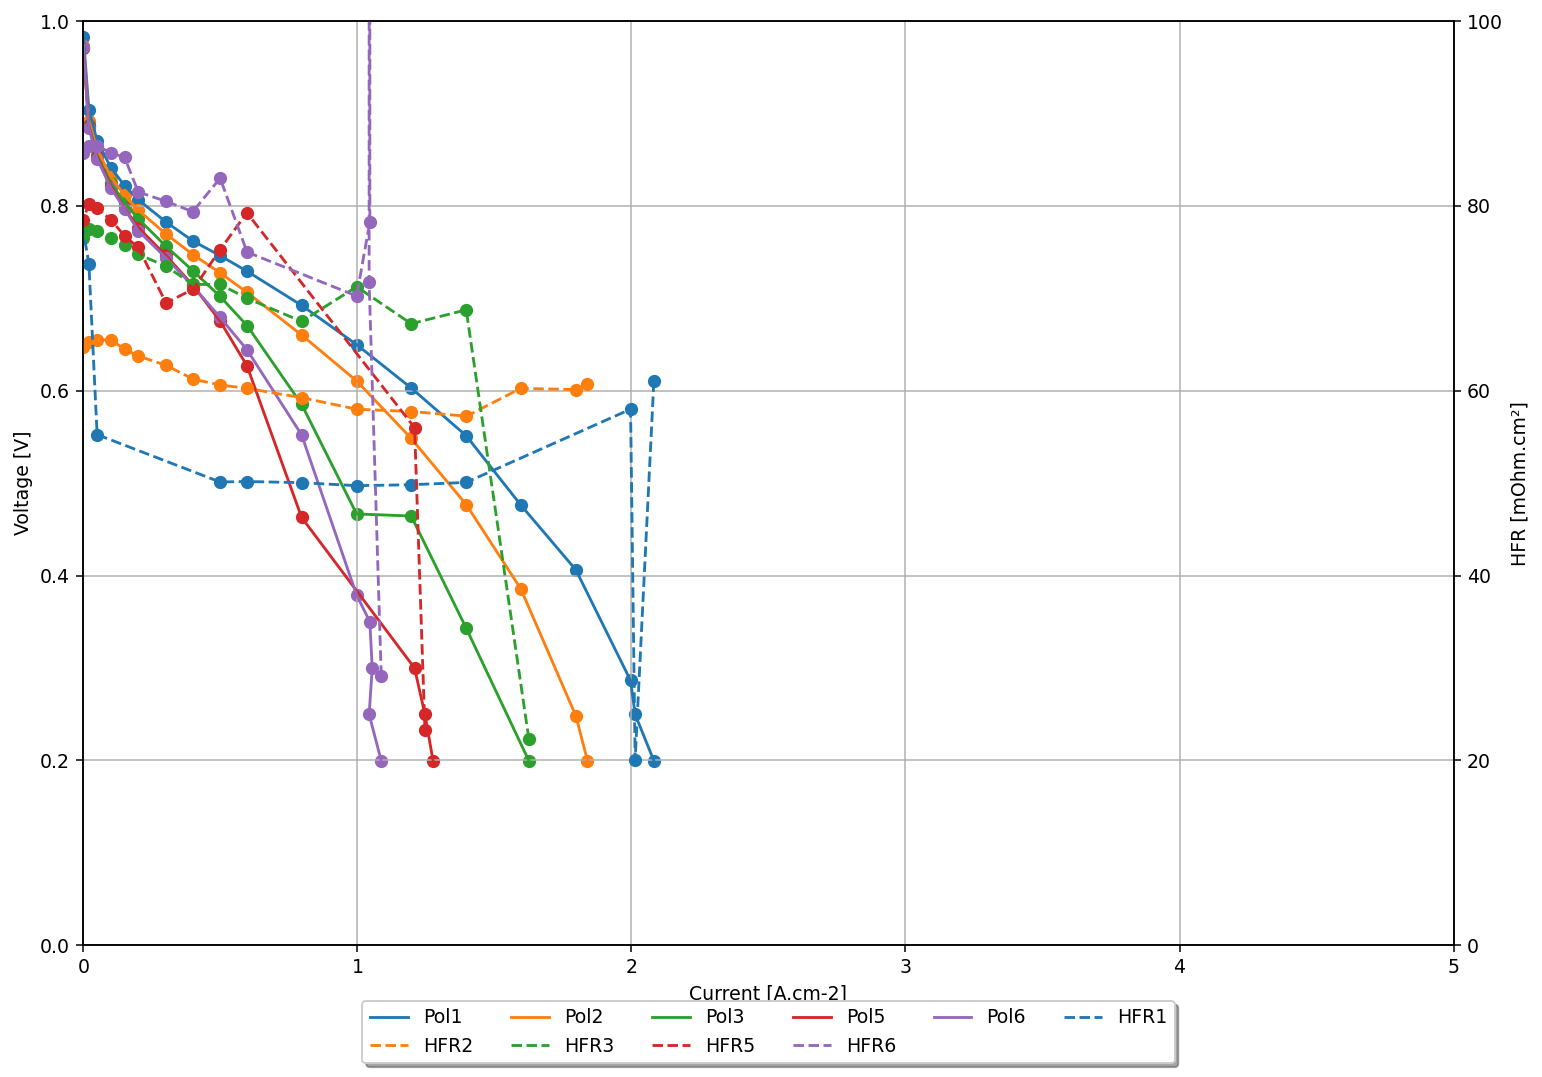

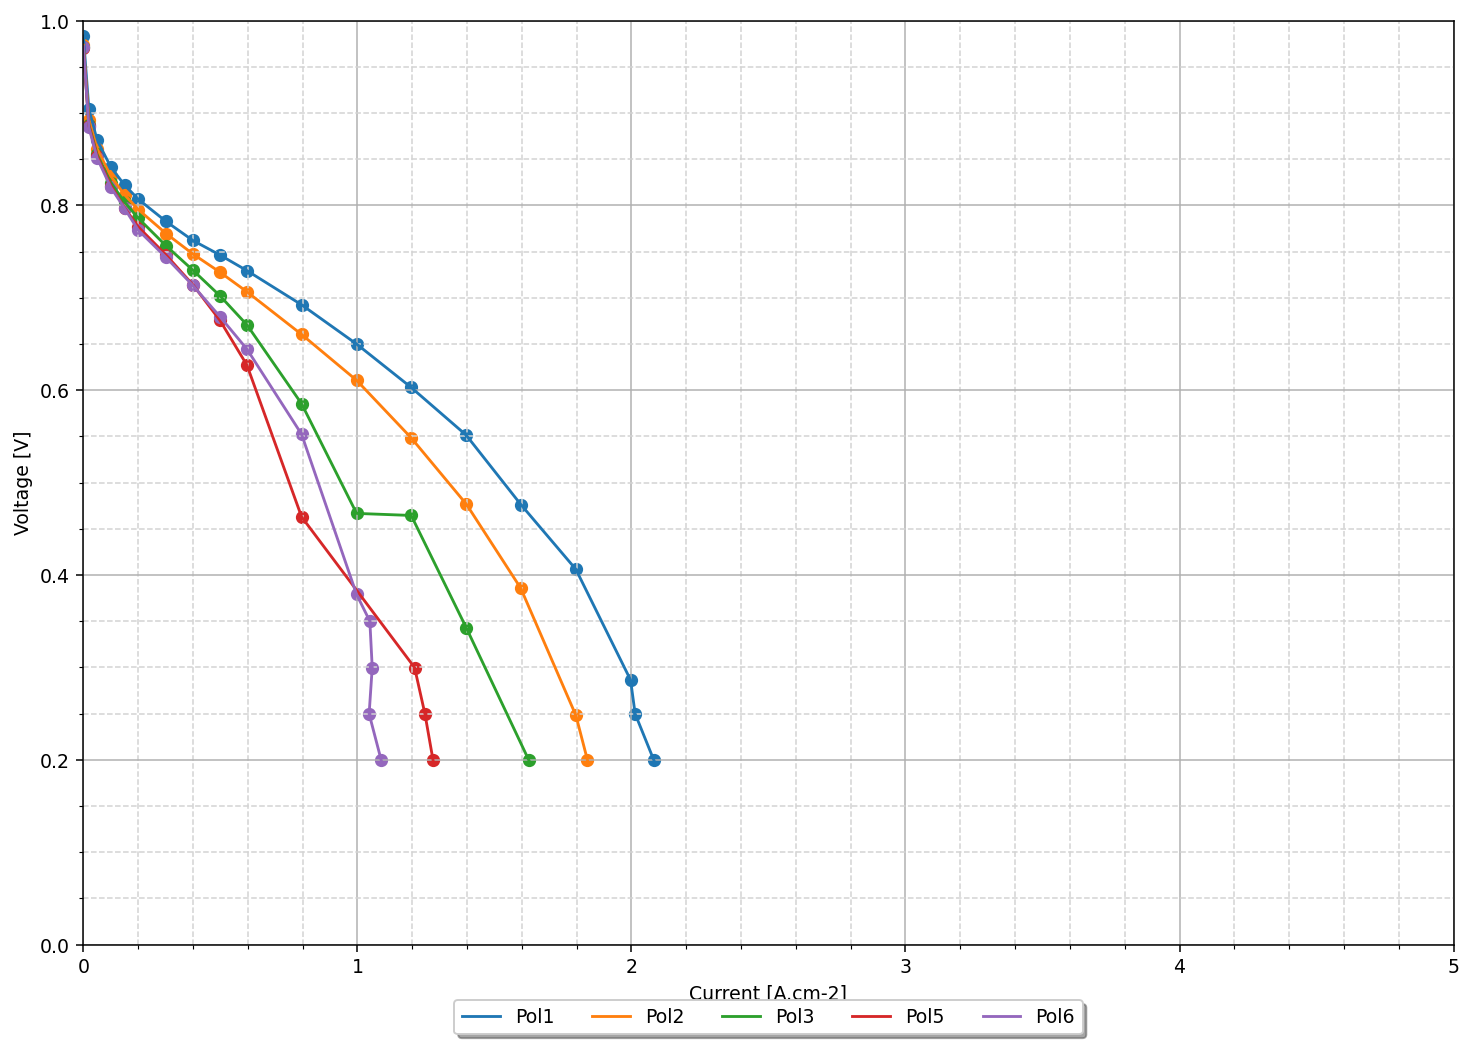

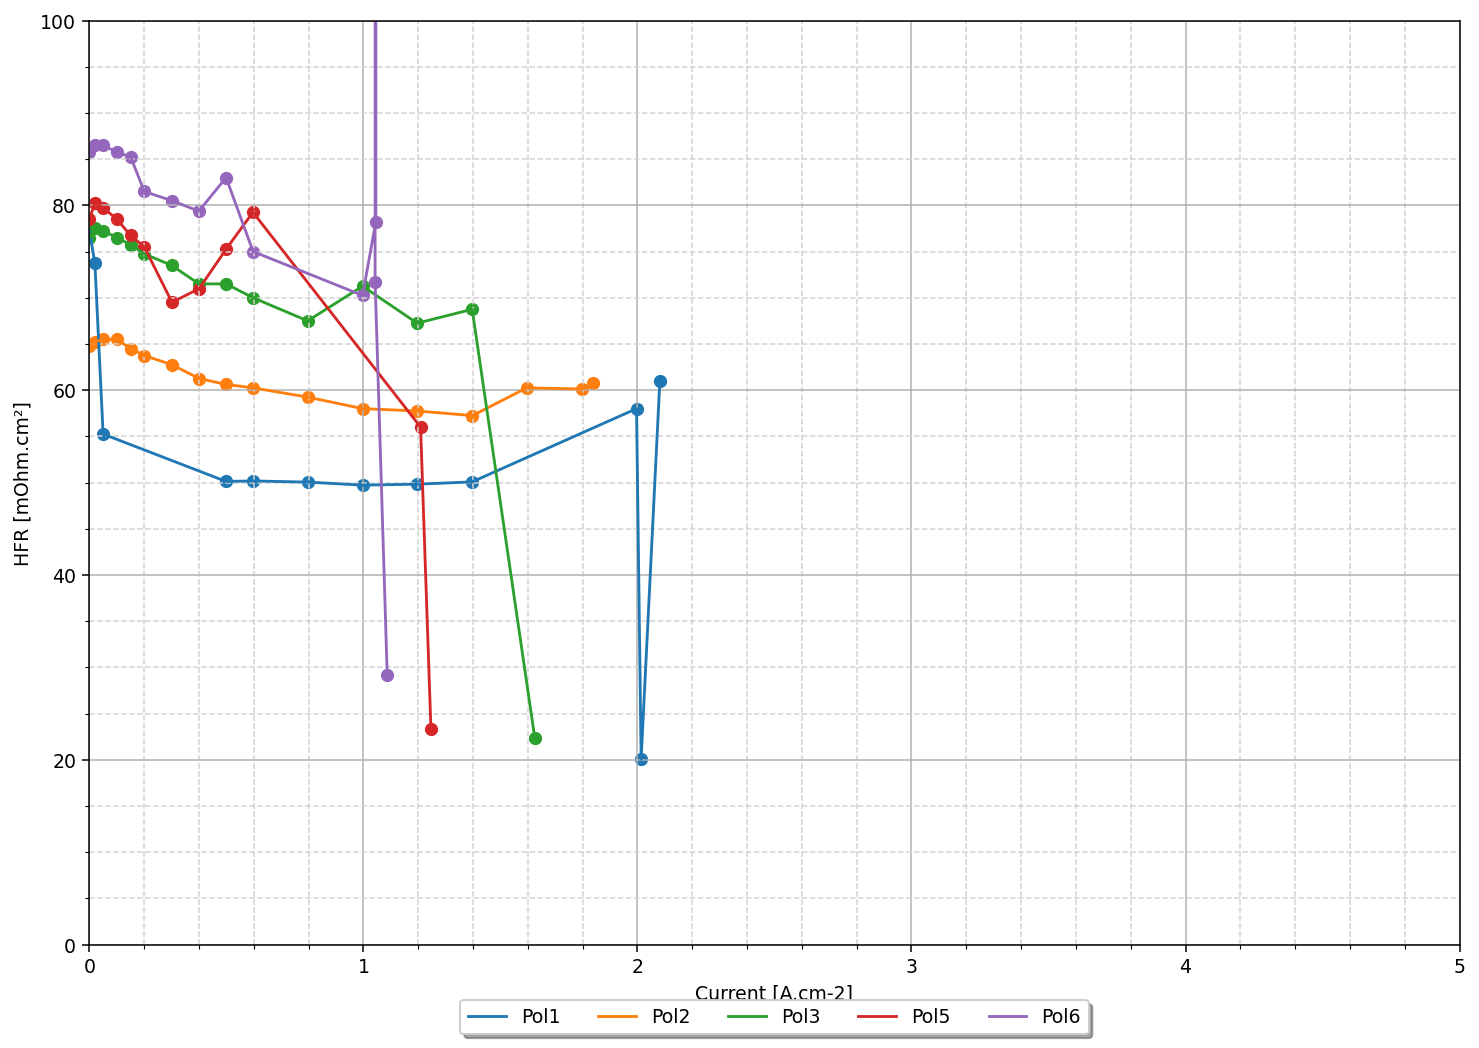

In [3]:
data_c1 = PolCurveData("C:/Users/kamal/Thesis-ZBT/datas/04_VV_datas/datas",
                       'Case 1')
data_c2 = PolCurveData("C:/Users/kamal/Thesis-ZBT/datas/05/datas",'Case 2')
data_c3 = PolCurveData("C:/Users/kamal/Thesis-ZBT/datas/06_datas/datas",'Case 3')

In [4]:
data_c1.dict_chosen_df

{'1':            CD         V      HFR
 0   95.115311  0.199677   2.9000
 1   79.925882  0.422302   2.7700
 2   74.942818  0.475777   2.4300
 3   69.963471  0.514305   2.4400
 4   64.943417  0.549466   2.2350
 5   59.929387  0.585706 -99.0000
 6   54.944993  0.611384 -99.0000
 7   49.934169  0.635872   2.0040
 8   44.917977  0.660623   1.9380
 9   39.902894  0.679901   1.8740
 10  34.906679  0.700093   1.8520
 11  29.902875  0.717335   1.8510
 12  24.934741  0.735490   1.8550
 13  19.905108  0.753235   1.8990
 14  14.937486  0.773105   1.9775
 15  12.462692  0.783832   1.9840
 16   9.976285  0.796307   1.9740
 17   7.525245  0.810974   2.0000
 18   5.009971  0.830621 -99.0000
 19   3.758044  0.843410   2.2700
 20   2.506205  0.861662   2.5300
 21   1.254013  0.889532   2.8600
 22   0.502219  0.920022   3.1500
 23   0.000000  1.040257   3.2200,
 '2':            CD         V     HFR
 0   95.235747  0.199669   2.760
 1   89.951036  0.335442   2.830
 2   84.966893  0.407959   2.450
 3   79

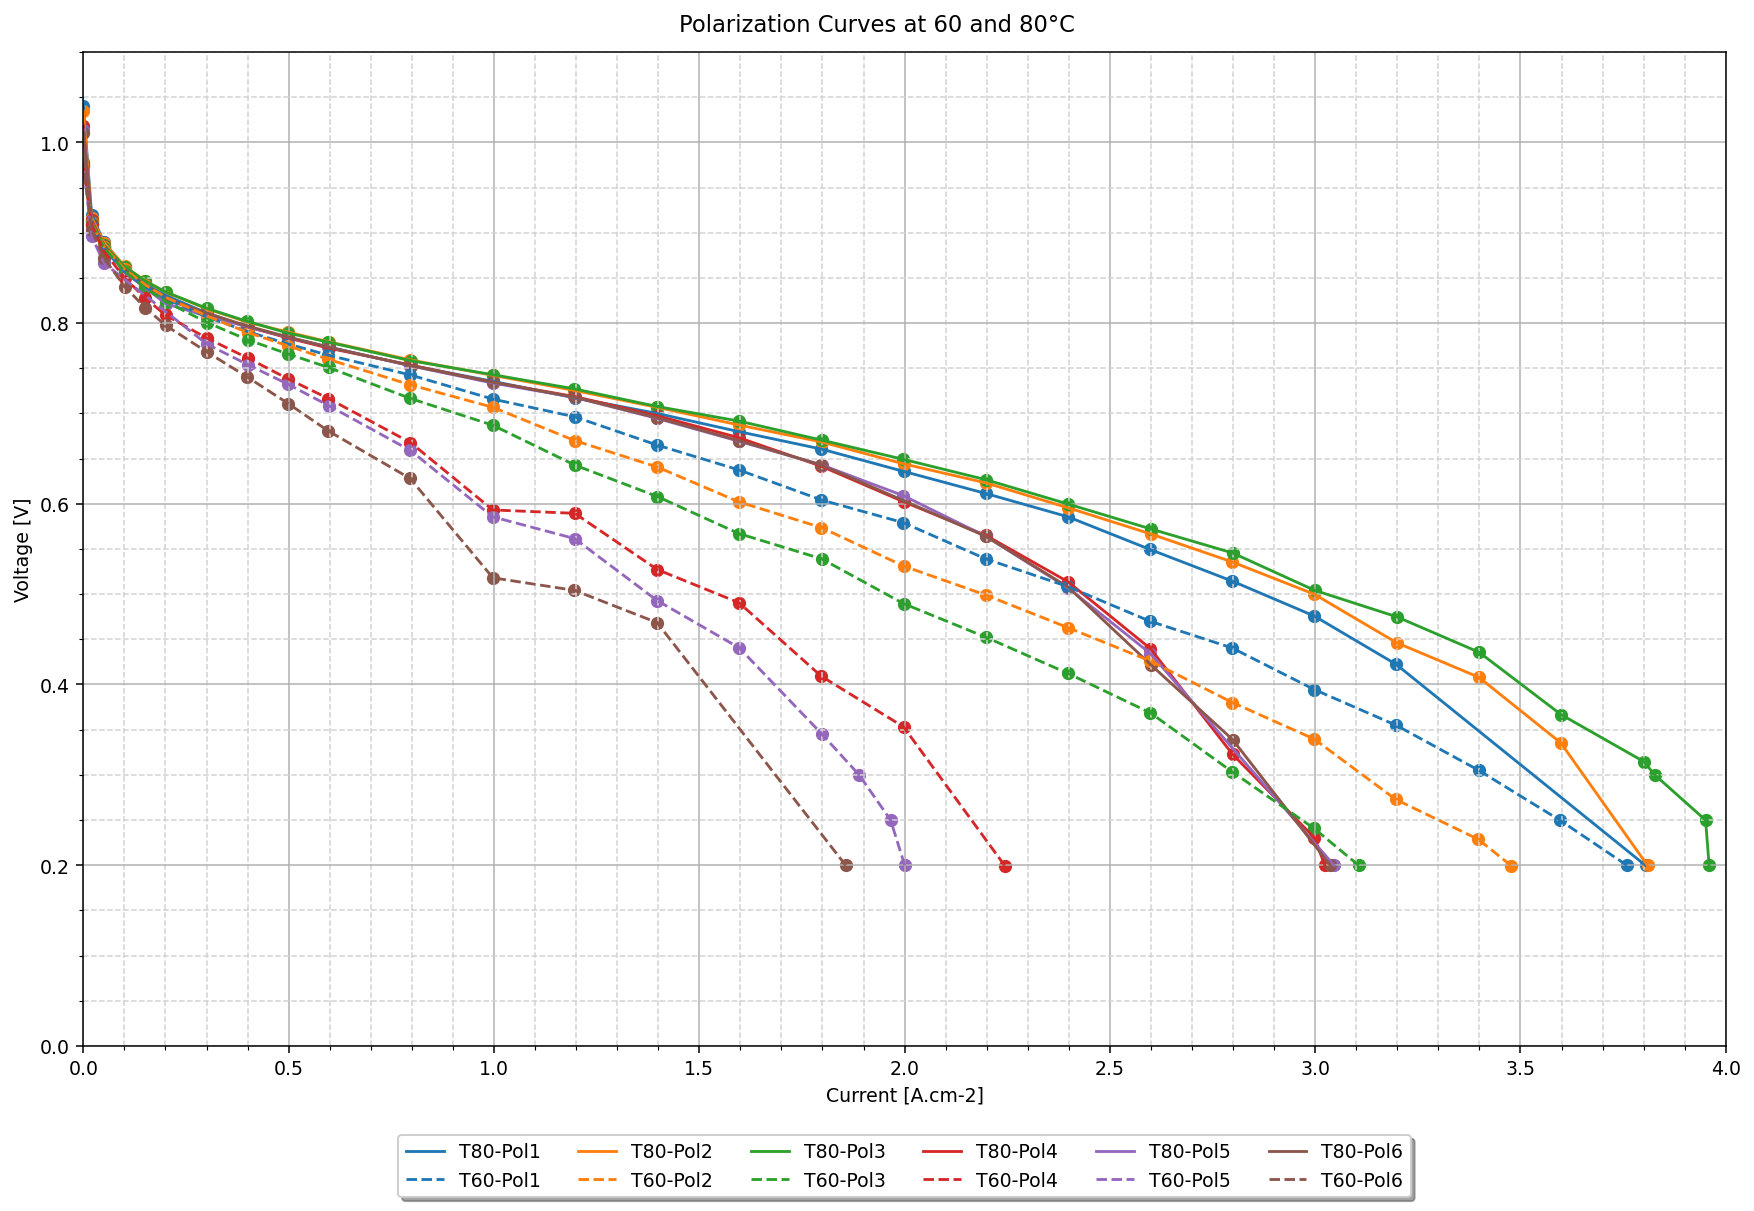

In [33]:
fig = plt.figure(figsize=(13, 9), dpi=136)
ax1 = fig.add_subplot(111)

for num, data in enumerate([data_c1.dict_chosen_df, data_c2.dict_chosen_df]):
                            # data_c3.dict_chosen_df]):
    color = ['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple',
             'tab:brown']
    for col, (key, val) in zip(color, data.items()):
        cur = val['CD'] / 25
        vol = val['V']
        if num == 0:
            ax1.plot(cur, vol, label=f'T80-Pol{key}', color=col)
        elif num == 1:
            ax1.plot(cur, vol, label=f'T60-Pol{key}', linestyle='--', color=col)
        else:
            ax1.plot(cur, vol, label=f'T70-Pol{key}', linestyle=':', color=col)
        ax1.scatter(cur, vol, color=col)
line, label = ax1.get_legend_handles_labels()
# ax1.legend(line, label, loc='upper center', bbox_to_anchor=(0.5, -0.05),
#                    fancybox=True, shadow=True, ncol=6)
ax1.legend(Plot.flip(line, 6), Plot.flip(label, 6),
                   loc='upper center', bbox_to_anchor=(0.5, -0.08),
                   fancybox=True, shadow=True, ncol=6)
ax1.minorticks_on()
plt.grid(True)
ax1.grid(True, which='minor', color='lightgrey', linestyle='--')
ax1.set_xlim(0, 4)
ax1.set_xlabel('Current [A.cm-2]')
ax1.set_ylim(0, 1.1)
ax1.set_ylabel('Voltage [V]')
plt.suptitle('Polarization Curves at 60 and 80°C')
plt.tight_layout()
# plt.show()
plt.savefig('pcs8060.pdf')

